In [1]:
!pip install tensorflow

  Using cached tensorflow-2.20.0rc0-cp313-cp313-win_amd64.whl.metadata (4.6 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached grpcio-1.74.0-cp313-cp313-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.11.2-py3-none-any.whl.metadata (5.9 kB)
  Using cached ml_dtypes-0.5.3-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Usin

In [1]:
import warnings
warnings.filterwarnings('ignore')

import datetime as dt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
df = pd.read_csv(r'C:\Users\User\Downloads\CAC40_stocks_2021_2023.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume,Stock
0,2020-04-08,28.559999,28.559999,26.639999,28.270000,28.270000,1051666.0,AC.PA
1,2020-04-09,28.629999,29.570000,28.049999,28.639999,28.639999,990955.0,AC.PA
2,2020-04-14,28.010000,28.340000,27.150000,27.590000,27.590000,907178.0,AC.PA
3,2020-04-15,27.170000,27.299999,25.459999,25.660000,25.660000,1378290.0,AC.PA
4,2020-04-16,25.879999,26.700001,24.080000,24.570000,24.570000,1474307.0,AC.PA
...,...,...,...,...,...,...,...,...
28559,2023-03-31,19.125000,19.195000,18.860001,18.910000,18.910000,930746.0,FR.PA
28560,2023-04-03,18.940001,19.325001,18.820000,19.070000,19.070000,819094.0,FR.PA
28561,2023-04-04,19.170000,19.309999,18.775000,18.775000,18.775000,931876.0,FR.PA
28562,2023-04-05,18.785000,18.799999,17.815001,18.125000,18.125000,1518496.0,FR.PA


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28564 entries, 0 to 28563
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       28564 non-null  object 
 1   Open       28564 non-null  float64
 2   High       28564 non-null  float64
 3   Low        28564 non-null  float64
 4   Close      28564 non-null  float64
 5   Adj Close  28564 non-null  float64
 6   Volume     28564 non-null  float64
 7   Stock      28564 non-null  object 
dtypes: float64(6), object(2)
memory usage: 1.7+ MB


In [4]:
data_missing_value = df.isna().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(df))*100,2)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value


,feature,missing_value,percentage


In [5]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Stock        0
dtype: int64

In [6]:
#df['Date'] = pd.to_datetime(df['Date'])

In [7]:
#df

In [8]:
category = ['Date', 'Stock']

In [9]:
for i in category:
    print(f"Value counts of {i} column")
    print(df[i].value_counts(), '\n')

Value counts of Date column
Date
2023-04-06    37
2020-04-08    37
2020-04-09    37
2020-04-14    37
2023-03-15    37
              ..
2020-04-22    37
2020-04-21    37
2020-04-20    37
2020-04-17    37
2020-04-16    37
Name: count, Length: 772, dtype: int64 

Value counts of Stock column
Stock
AC.PA      772
AI.PA      772
AIR.PA     772
ALO.PA     772
CS.PA      772
BN.PA      772
EN.PA      772
CAP.PA     772
CA.PA      772
ACA.PA     772
BNP.PA     772
ENGI.PA    772
EL.PA      772
RMS.PA     772
OR.PA      772
LR.PA      772
MC.PA      772
ML.PA      772
ORA.PA     772
RI.PA      772
PUB.PA     772
RNO.PA     772
SAF.PA     772
SGO.PA     772
SAN.PA     772
SU.PA      772
GLE.PA     772
SW.PA      772
STM.PA     772
HO.PA      772
ATO.PA     772
VIE.PA     772
DG.PA      772
VIV.PA     772
WLN.PA     772
KER.PA     772
FR.PA      772
Name: count, dtype: int64 



#### EDA

In [10]:
EDA = df.copy()

In [11]:
EDA['Date'] = pd.to_datetime(EDA['Date'], format='%Y-%m-%d')

In [12]:
EDA

,Date,Open,High,Low,Close,Adj Close,Volume,Stock
0,2020-04-08,28.559999,28.559999,26.639999,28.270000,28.270000,1051666.0,AC.PA
1,2020-04-09,28.629999,29.570000,28.049999,28.639999,28.639999,990955.0,AC.PA
2,2020-04-14,28.010000,28.340000,27.150000,27.590000,27.590000,907178.0,AC.PA
3,2020-04-15,27.170000,27.299999,25.459999,25.660000,25.660000,1378290.0,AC.PA
4,2020-04-16,25.879999,26.700001,24.080000,24.570000,24.570000,1474307.0,AC.PA
...,...,...,...,...,...,...,...,...
28559,2023-03-31,19.125000,19.195000,18.860001,18.910000,18.910000,930746.0,FR.PA
28560,2023-04-03,18.940001,19.325001,18.820000,19.070000,19.070000,819094.0,FR.PA
28561,2023-04-04,19.170000,19.309999,18.775000,18.775000,18.775000,931876.0,FR.PA
28562,2023-04-05,18.785000,18.799999,17.815001,18.125000,18.125000,1518496.0,FR.PA


In [13]:
EDA.sort_values('Date', inplace=True)

In [14]:
EDA

,Date,Open,High,Low,Close,Adj Close,Volume,Stock
0,2020-04-08,28.559999,28.559999,26.639999,28.270000,28.270000,1051666.0,AC.PA
21616,2020-04-08,20.350000,21.170000,20.260000,21.170000,20.767323,3137785.0,STM.PA
22388,2020-04-08,73.620003,74.699997,70.860001,72.680000,66.954674,565191.0,HO.PA
18528,2020-04-08,82.500000,83.010002,80.930000,82.000000,73.638885,2481954.0,SAN.PA
5404,2020-04-08,75.220001,77.160004,74.620003,77.160004,74.076416,485287.0,CAP.PA
...,...,...,...,...,...,...,...,...
7719,2023-04-06,10.512000,10.664000,10.478000,10.608000,10.608000,6835910.0,ACA.PA
20071,2023-04-06,143.199997,143.240005,141.380005,142.639999,142.639999,842553.0,SU.PA
8491,2023-04-06,56.330002,57.419998,56.230000,57.230000,57.230000,3534417.0,BNP.PA
9263,2023-04-06,14.958000,15.210000,14.942000,15.066000,15.066000,6274651.0,ENGI.PA


In [15]:
print("Total unique stock names:", EDA['Stock'].nunique())

Total unique stock names: 37


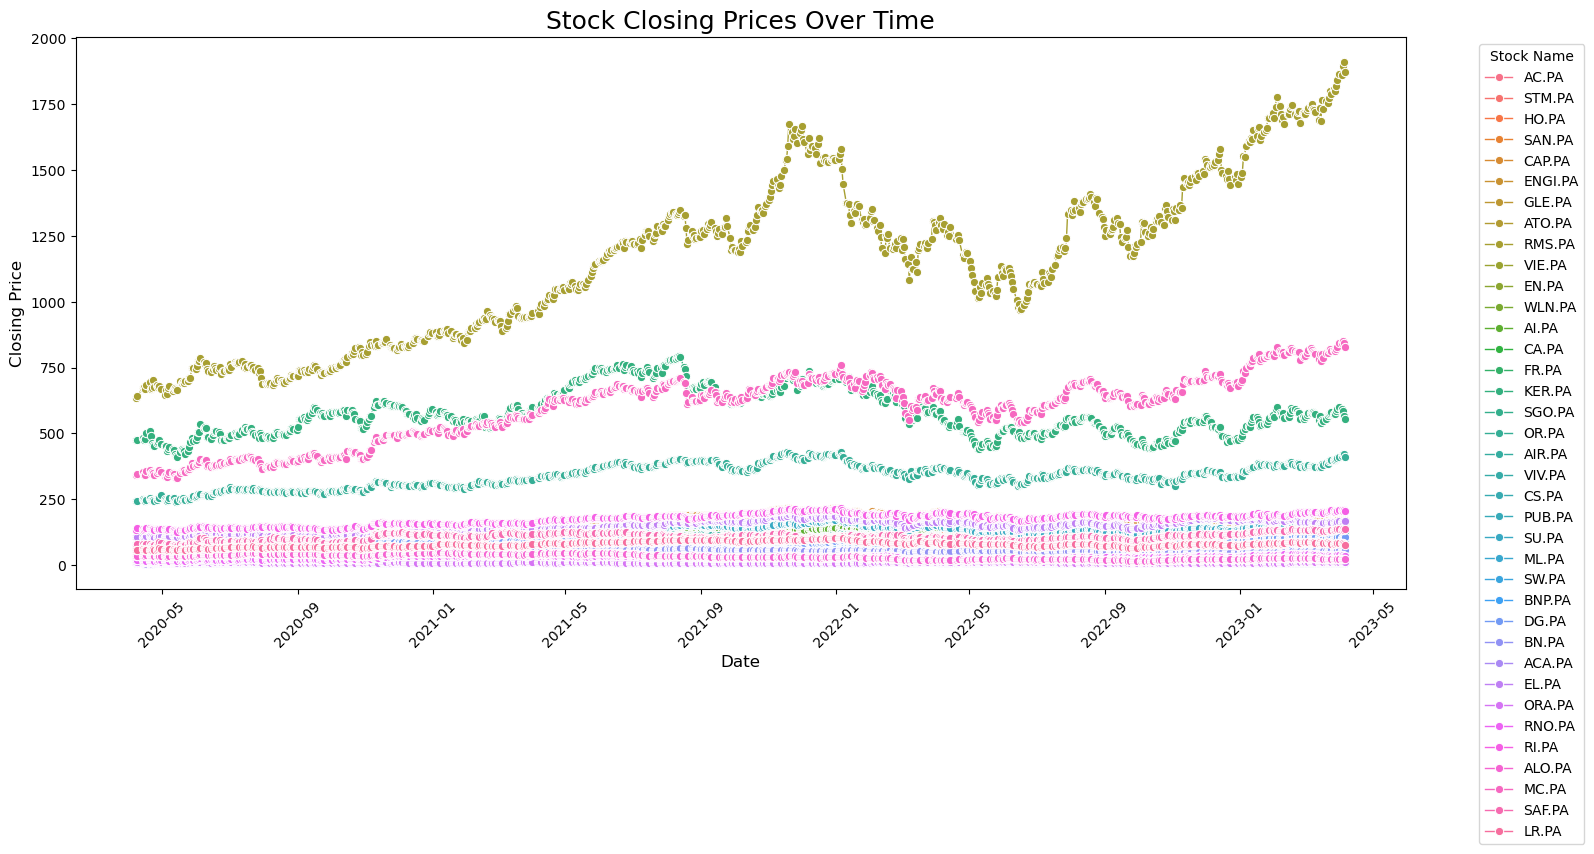

In [16]:
plt.figure(figsize=(16, 8))  # Bigger figure for many stocks
sns.lineplot(data=EDA, x='Date', y='Close', hue='Stock', marker='o', linewidth=1)

plt.title("Stock Closing Prices Over Time", fontsize=18)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Closing Price", fontsize=12)
plt.xticks(rotation=45)


plt.legend(title="Stock Name", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

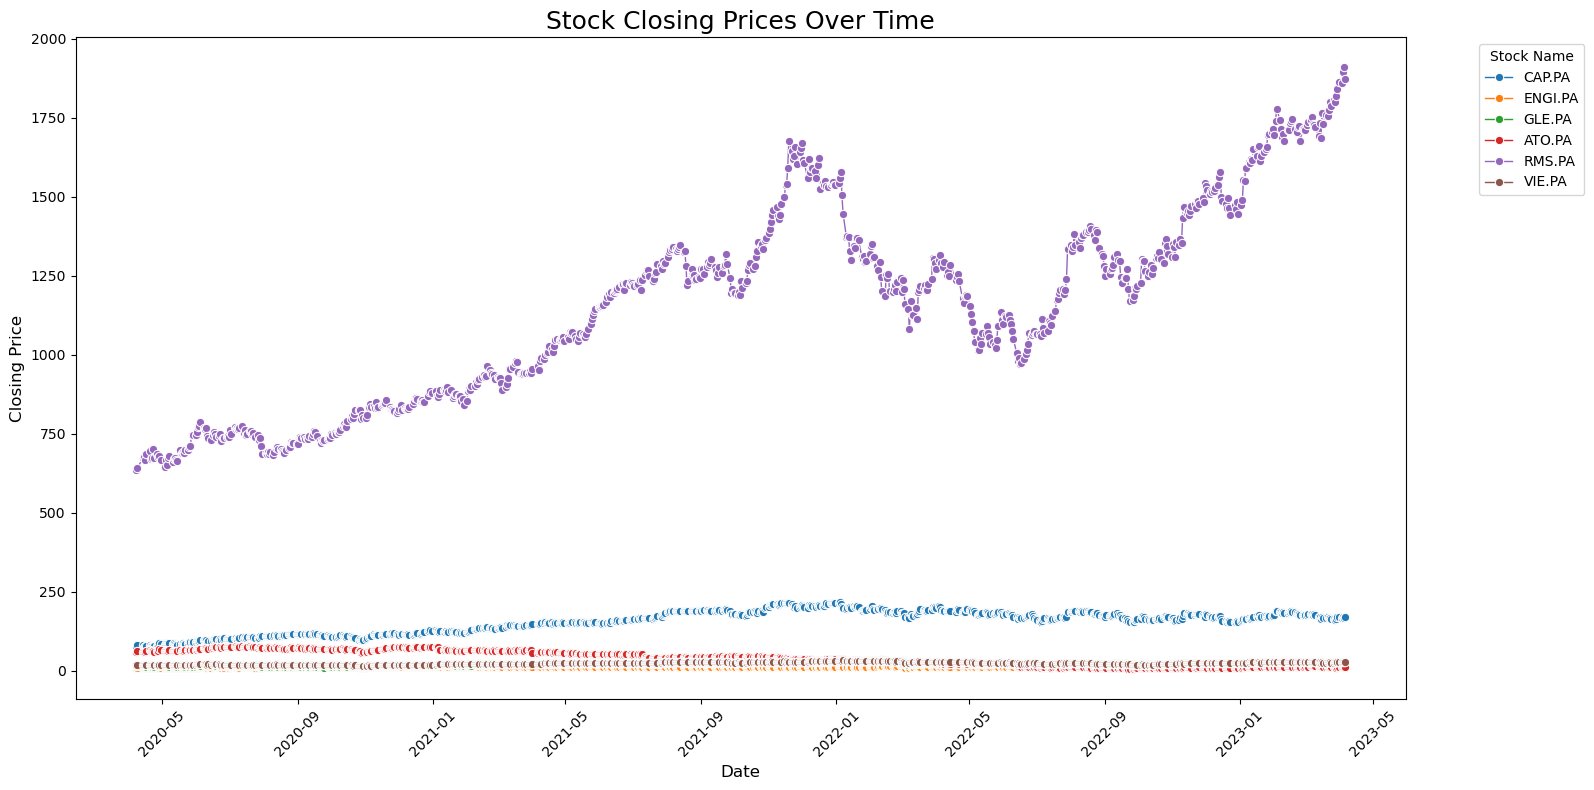

In [17]:
selected_stocks = ['ENGI.PA', 'GLE.PA', 'ATO.PA', 'RMS.PA', 'VIE.PA', 'CAP.PA']

# Filter DataFrame to only those 3
EDA_filtered = EDA[EDA['Stock'].isin(selected_stocks)]

plt.figure(figsize=(16, 8))  # Bigger figure for many stocks
sns.lineplot(data=EDA_filtered, x='Date', y='Close', hue='Stock', marker='o', linewidth=1)

plt.title("Stock Closing Prices Over Time", fontsize=18)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Closing Price", fontsize=12)
plt.xticks(rotation=45)


plt.legend(title="Stock Name", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

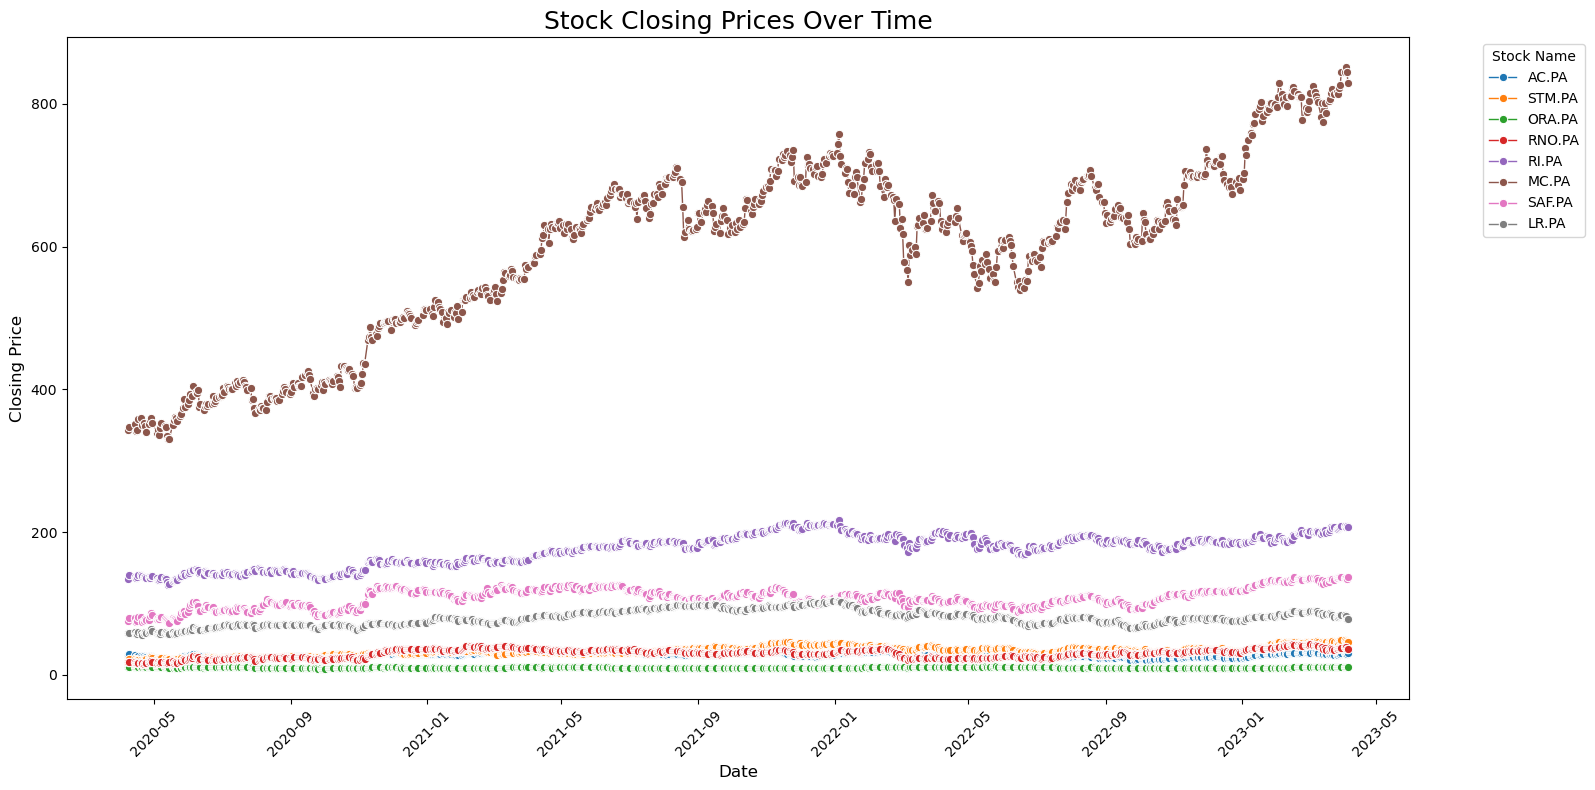

In [18]:
selected_stocks = ['AC.PA', 'STM.PA', 'LR.PA', 'SAF.PA', 'MC.PA', 'RI.PA', 'RNO.PA', 'ORA.PA']

# Filter DataFrame to only those 3
EDA_filtered = EDA[EDA['Stock'].isin(selected_stocks)]

plt.figure(figsize=(16, 8))  # Bigger figure for many stocks
sns.lineplot(data=EDA_filtered, x='Date', y='Close', hue='Stock', marker='o', linewidth=1)

plt.title("Stock Closing Prices Over Time", fontsize=18)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Closing Price", fontsize=12)
plt.xticks(rotation=45)


plt.legend(title="Stock Name", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

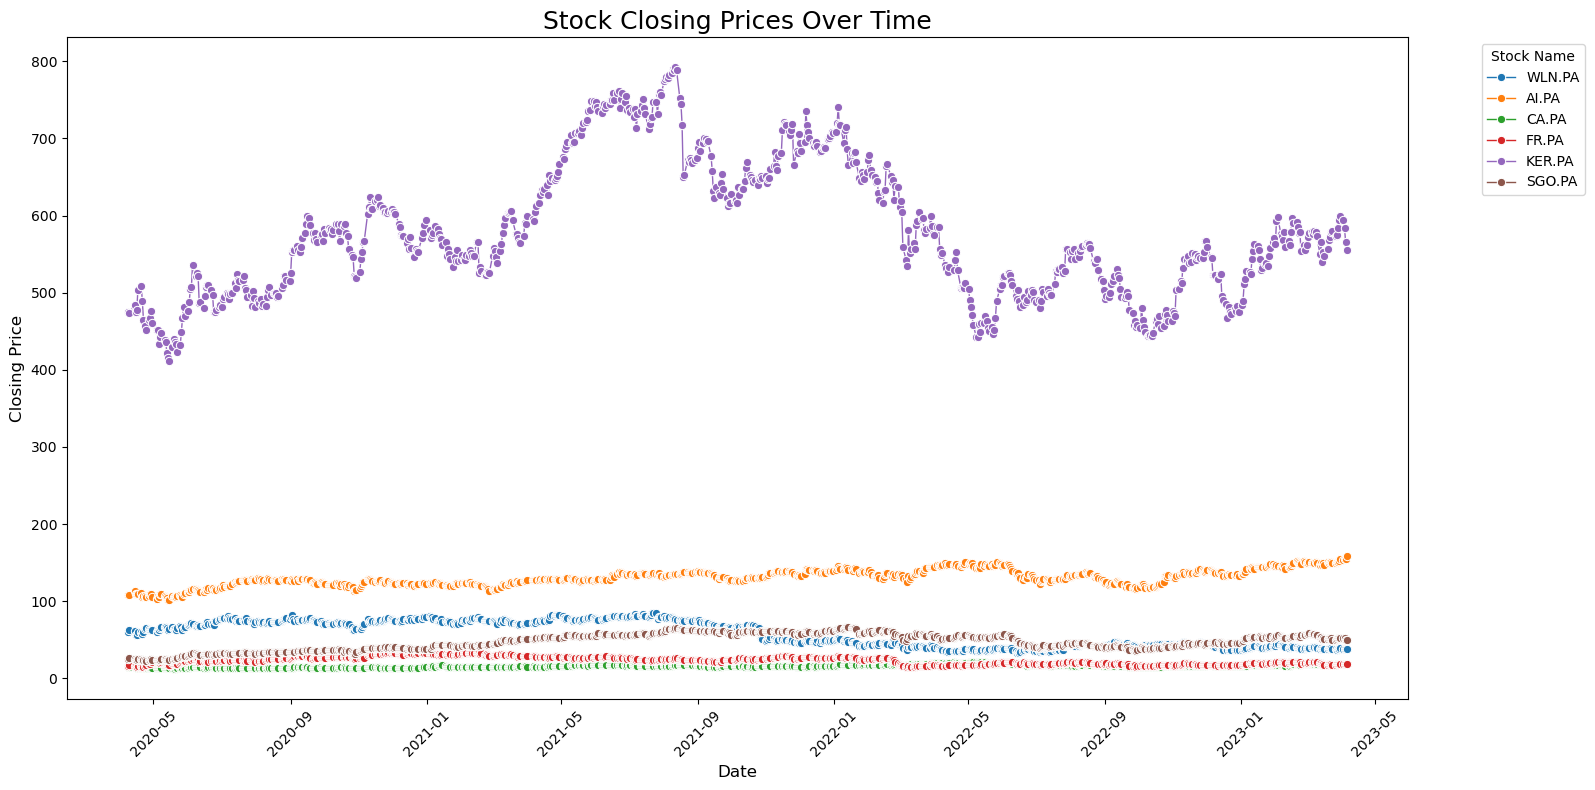

In [19]:
selected_stocks = ['WLN.PA', 'AI.PA', 'CA.PA', 'FR.PA', 'KER.PA', 'SGO.PA']

# Filter DataFrame to only those 3
EDA_filtered = EDA[EDA['Stock'].isin(selected_stocks)]

plt.figure(figsize=(16, 8))  # Bigger figure for many stocks
sns.lineplot(data=EDA_filtered, x='Date', y='Close', hue='Stock', marker='o', linewidth=1)

plt.title("Stock Closing Prices Over Time", fontsize=18)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Closing Price", fontsize=12)
plt.xticks(rotation=45)


plt.legend(title="Stock Name", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### From the time series graph above we could see the best perfromer Stock from 2020 until 2023 from the index is CAP.PA followed by AC.PA and WLN.PA, the most interesting Stock from data is possibly WLN.PA since it shows an opening to buy the author might try to test it on volume if the stock is in downtrend or in opening

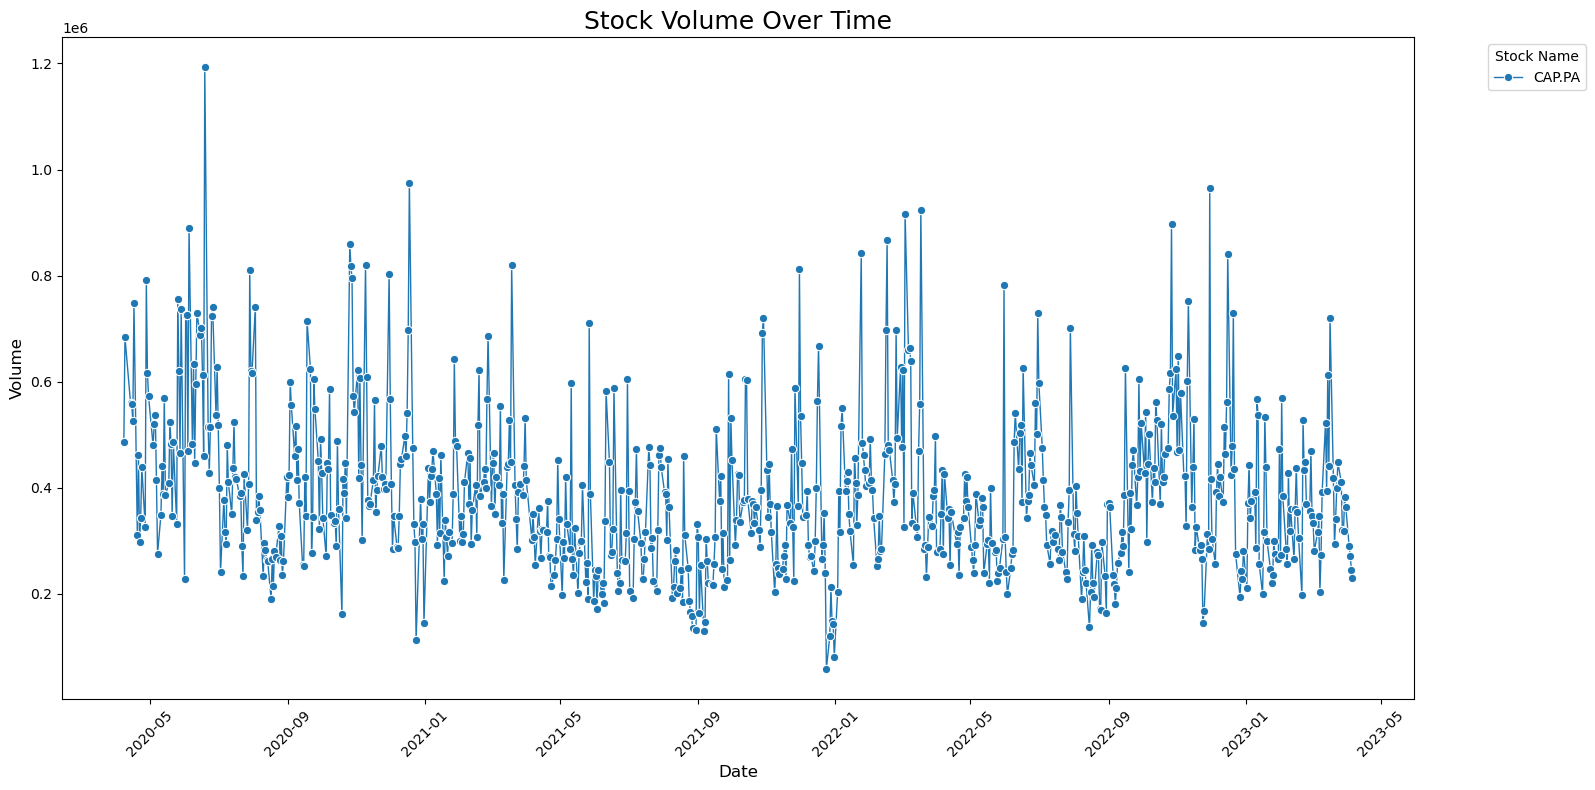

In [20]:
selected_stocks_2 = ['CAP.PA']

# Filter DataFrame to only those 3
EDA_filtered_2 = EDA[EDA['Stock'].isin(selected_stocks_2)]

plt.figure(figsize=(16, 8))  # Bigger figure for many stocks
sns.lineplot(data=EDA_filtered_2, x='Date', y='Volume', hue='Stock', marker='o', linewidth=1)

plt.title("Stock Volume Over Time", fontsize=18)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Volume", fontsize=12)
plt.xticks(rotation=45)


plt.legend(title="Stock Name", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

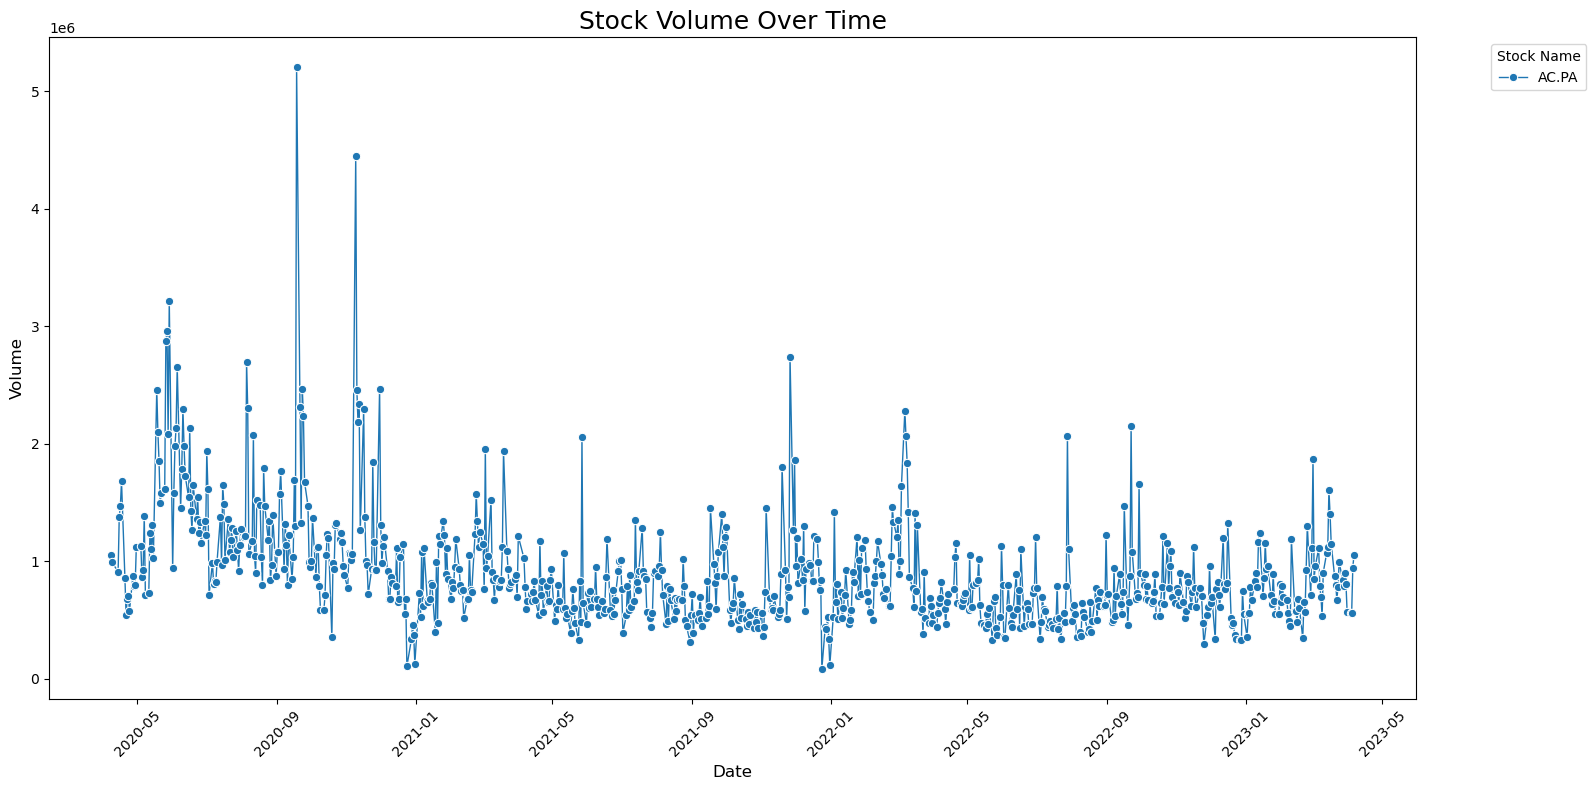

In [21]:
selected_stocks_2 = ['AC.PA']

# Filter DataFrame to only those 3
EDA_filtered_2 = EDA[EDA['Stock'].isin(selected_stocks_2)]

plt.figure(figsize=(16, 8))  # Bigger figure for many stocks
sns.lineplot(data=EDA_filtered_2, x='Date', y='Volume', hue='Stock', marker='o', linewidth=1)

plt.title("Stock Volume Over Time", fontsize=18)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Volume", fontsize=12)
plt.xticks(rotation=45)


plt.legend(title="Stock Name", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

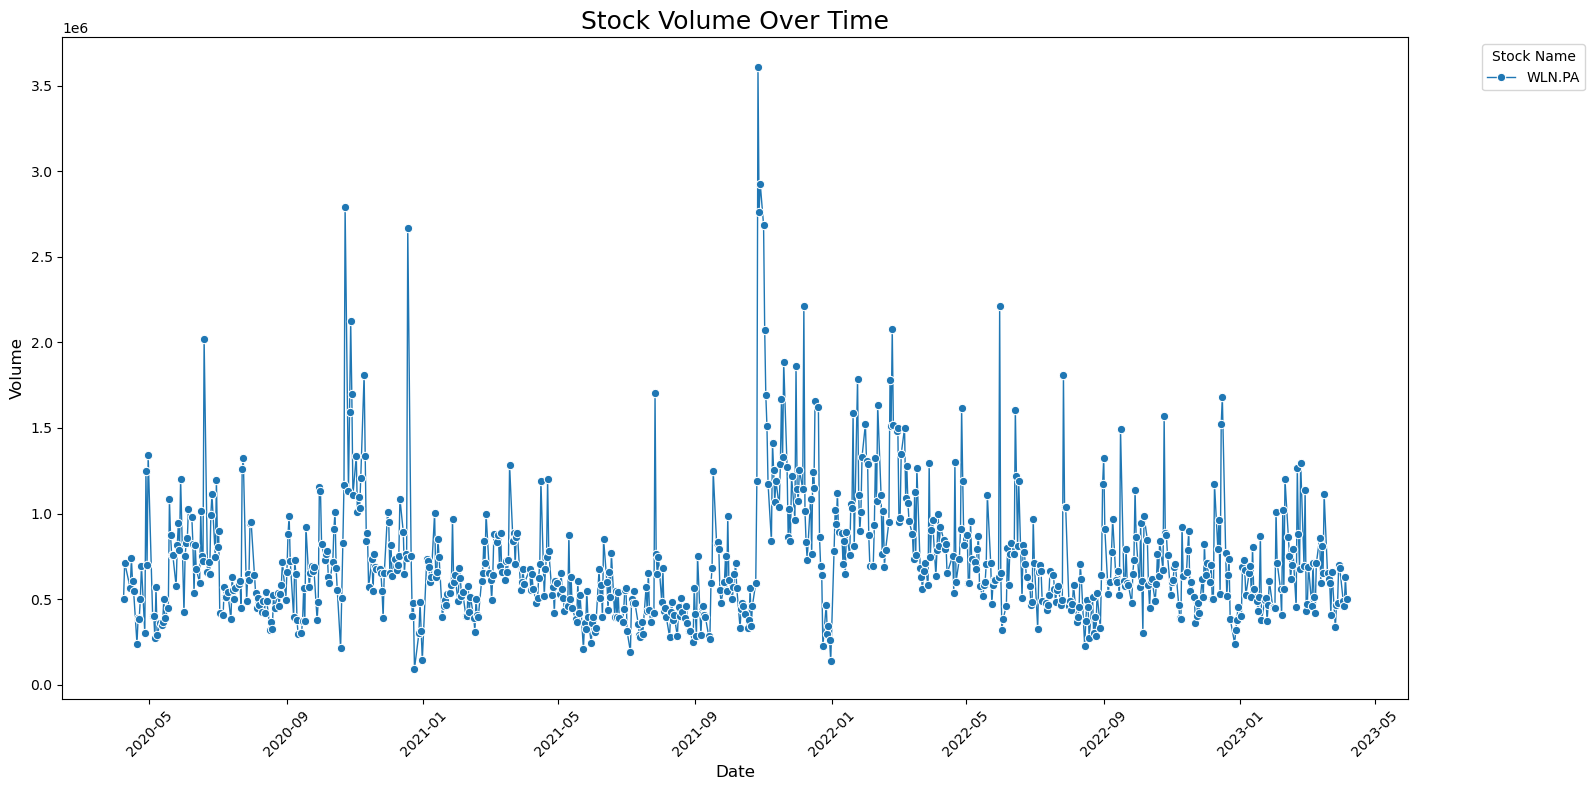

In [22]:
selected_stocks_2 = ['WLN.PA']

# Filter DataFrame to only those 3
EDA_filtered_2 = EDA[EDA['Stock'].isin(selected_stocks_2)]

plt.figure(figsize=(16, 8))  # Bigger figure for many stocks
sns.lineplot(data=EDA_filtered_2, x='Date', y='Volume', hue='Stock', marker='o', linewidth=1)

plt.title("Stock Volume Over Time", fontsize=18)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Volume", fontsize=12)
plt.xticks(rotation=45)


plt.legend(title="Stock Name", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### While the prices in the index shows an increase the volume shows otherwise.

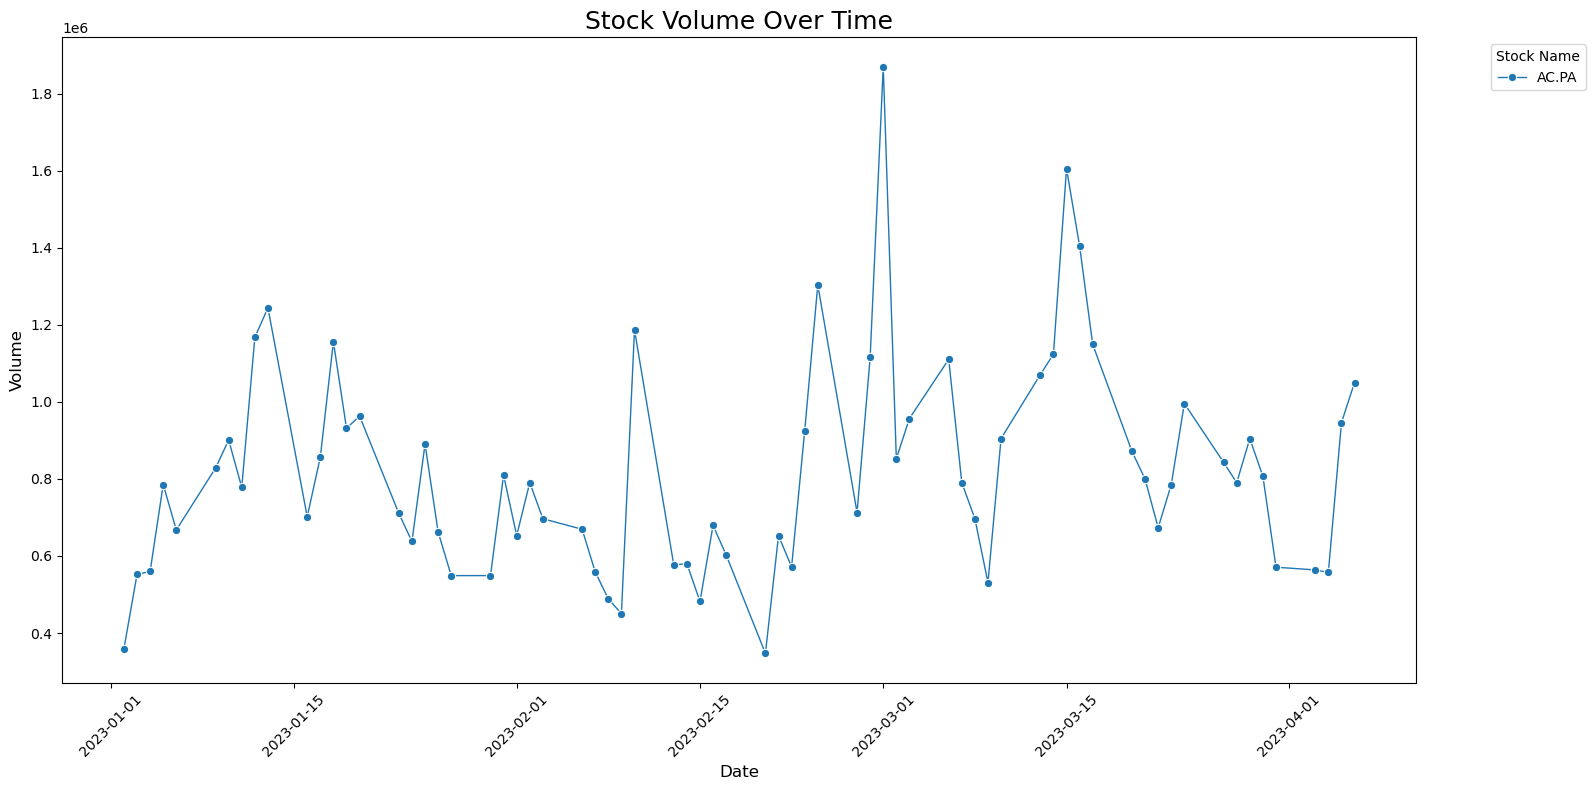

In [23]:
selected_stocks_3 = ['AC.PA']

# Filter DataFrame to only those 3
EDA_filtered_3 = EDA[(EDA['Stock'].isin(selected_stocks_3)) & (EDA['Date'].dt.year == 2023)]

plt.figure(figsize=(16, 8))  # Bigger figure for many stocks
sns.lineplot(data=EDA_filtered_3, x='Date', y='Volume', hue='Stock', marker='o', linewidth=1)

plt.title("Stock Volume Over Time", fontsize=18)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Volume", fontsize=12)
plt.xticks(rotation=45)


plt.legend(title="Stock Name", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

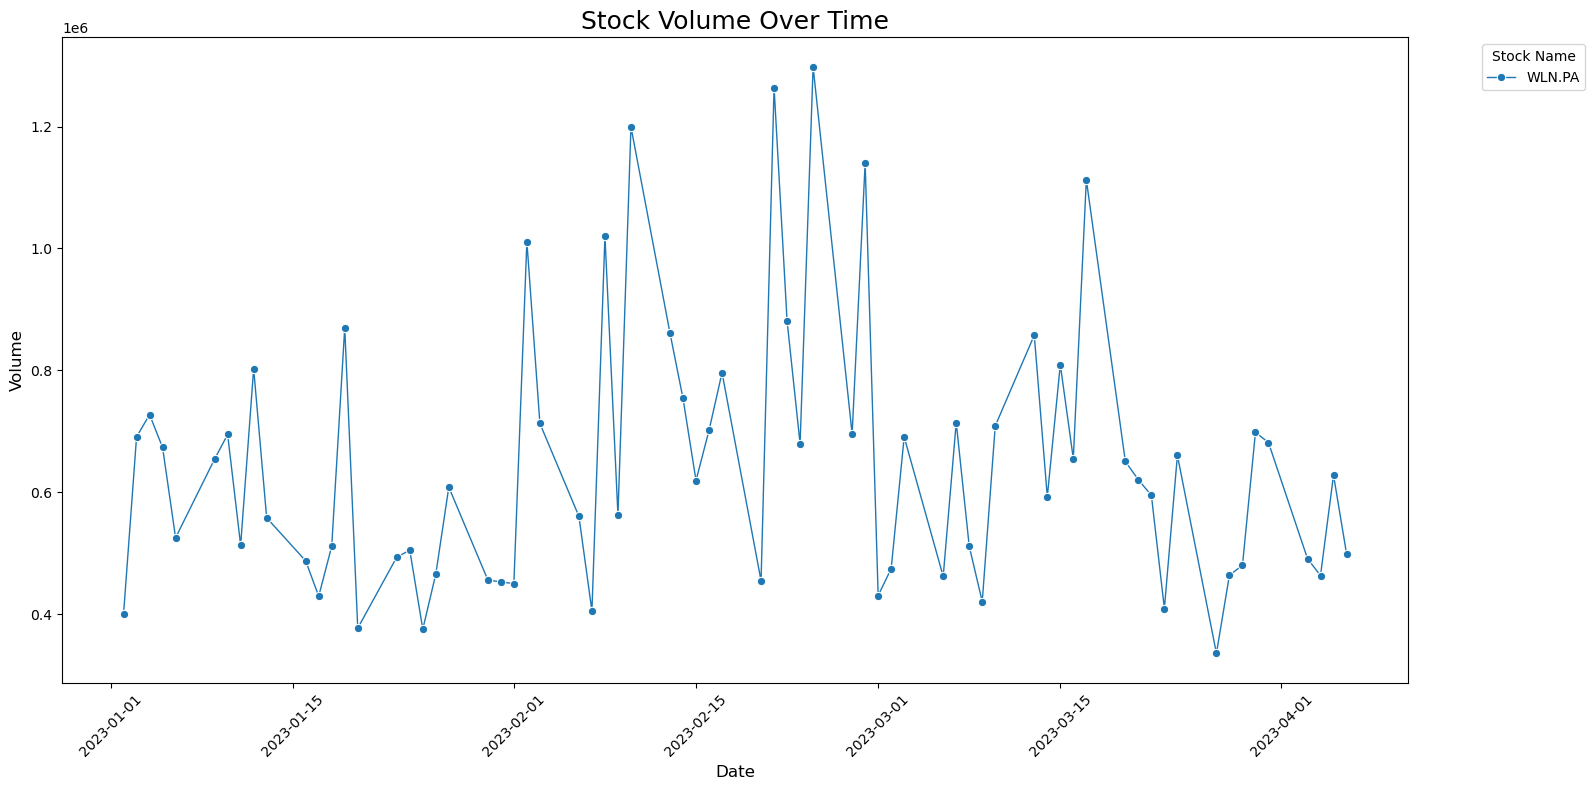

In [24]:
selected_stocks_3 = ['WLN.PA']

# Filter DataFrame to only those 3
EDA_filtered_3 = EDA[(EDA['Stock'].isin(selected_stocks_3)) & (EDA['Date'].dt.year == 2023)]

plt.figure(figsize=(16, 8))  # Bigger figure for many stocks
sns.lineplot(data=EDA_filtered_3, x='Date', y='Volume', hue='Stock', marker='o', linewidth=1)

plt.title("Stock Volume Over Time", fontsize=18)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Volume", fontsize=12)
plt.xticks(rotation=45)


plt.legend(title="Stock Name", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

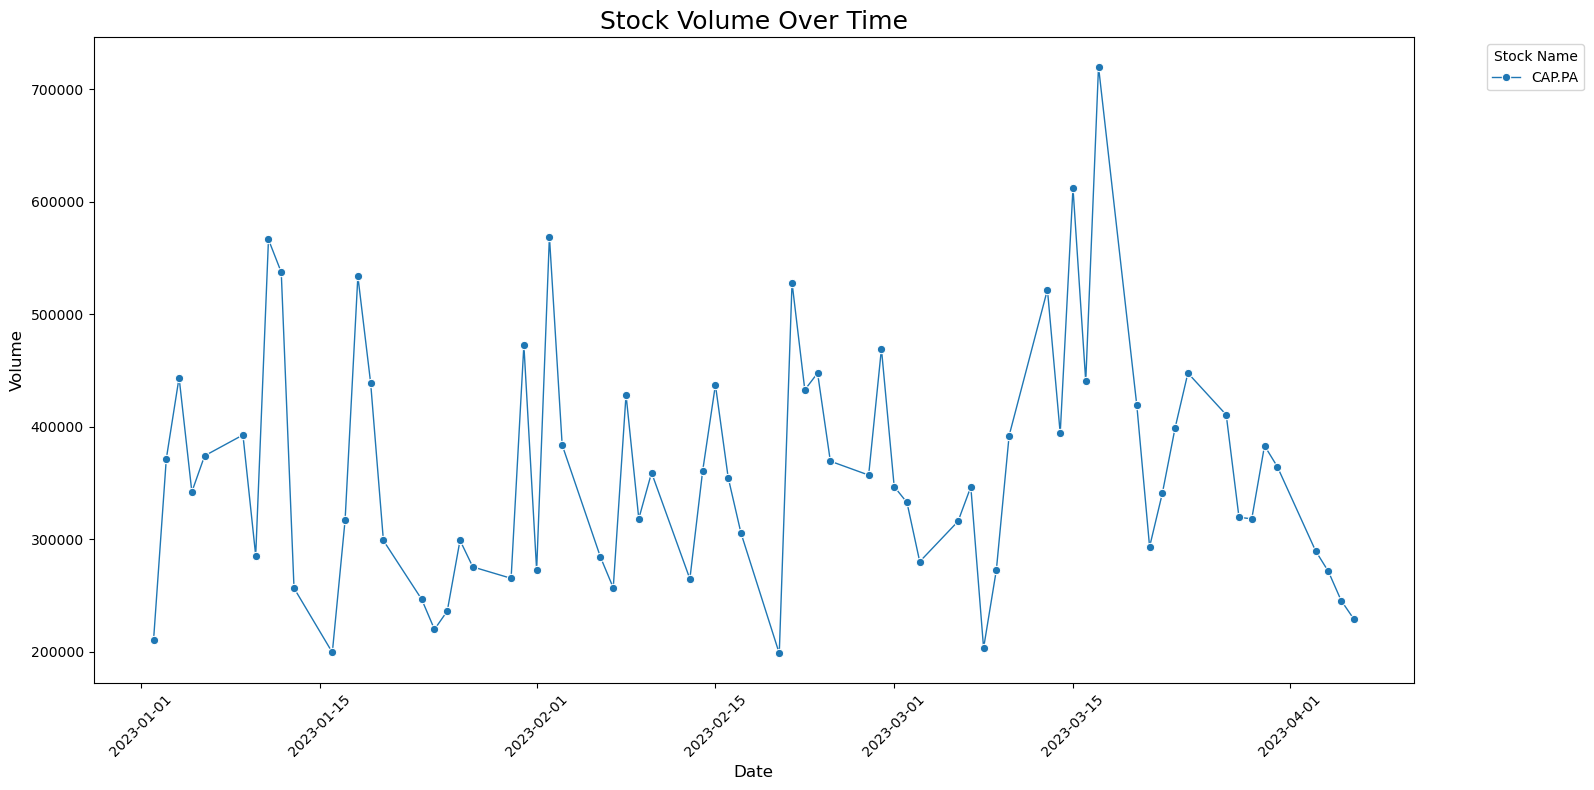

In [25]:
selected_stocks_3 = ['CAP.PA']

# Filter DataFrame to only those 3
EDA_filtered_3 = EDA[(EDA['Stock'].isin(selected_stocks_3)) & (EDA['Date'].dt.year == 2023)]

plt.figure(figsize=(16, 8))  # Bigger figure for many stocks
sns.lineplot(data=EDA_filtered_3, x='Date', y='Volume', hue='Stock', marker='o', linewidth=1)

plt.title("Stock Volume Over Time", fontsize=18)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Volume", fontsize=12)
plt.xticks(rotation=45)


plt.legend(title="Stock Name", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### Based on earliest volume data it shows AC.PA has an increase on Volume while the other 2 (CAP.PA & WLN.PA) has dcreasing volume

In [26]:
EDA

,Date,Open,High,Low,Close,Adj Close,Volume,Stock
0,2020-04-08,28.559999,28.559999,26.639999,28.270000,28.270000,1051666.0,AC.PA
21616,2020-04-08,20.350000,21.170000,20.260000,21.170000,20.767323,3137785.0,STM.PA
22388,2020-04-08,73.620003,74.699997,70.860001,72.680000,66.954674,565191.0,HO.PA
18528,2020-04-08,82.500000,83.010002,80.930000,82.000000,73.638885,2481954.0,SAN.PA
5404,2020-04-08,75.220001,77.160004,74.620003,77.160004,74.076416,485287.0,CAP.PA
...,...,...,...,...,...,...,...,...
7719,2023-04-06,10.512000,10.664000,10.478000,10.608000,10.608000,6835910.0,ACA.PA
20071,2023-04-06,143.199997,143.240005,141.380005,142.639999,142.639999,842553.0,SU.PA
8491,2023-04-06,56.330002,57.419998,56.230000,57.230000,57.230000,3534417.0,BNP.PA
9263,2023-04-06,14.958000,15.210000,14.942000,15.066000,15.066000,6274651.0,ENGI.PA


In [27]:
EDA_con = EDA.drop(['Stock'], axis =1)

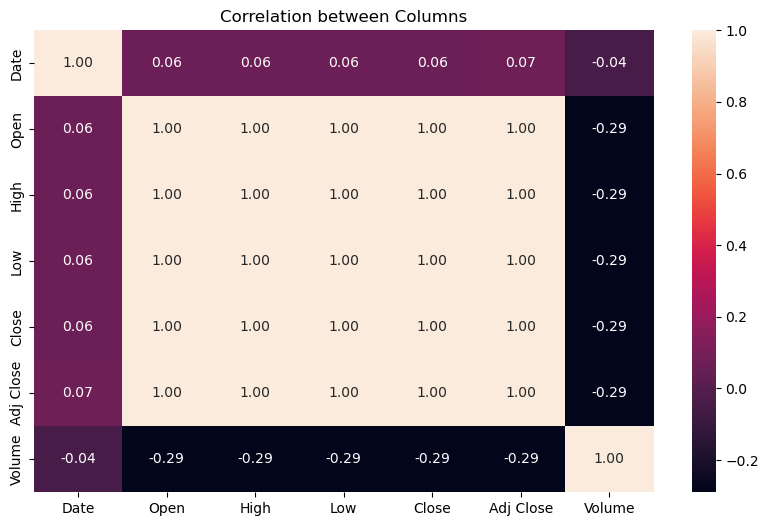

In [28]:
corr = EDA_con.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.title('Correlation between Columns')
plt.show()

#### LSTM TESTING

In [29]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [30]:
def load_data(company, start, end):
    """
    Load data for the specified company and date range.

    :param company: The company's stock symbol (str)
    :param start: The starting date for the data range (str or datetime)
    :param end: The ending date for the data range (str or datetime)
    :return: A dataframe containing the relevant stock data (pandas.DataFrame)
    """
    dataframe = df.copy()
    dataframe = dataframe.loc[dataframe.Stock == company, :]
    dataframe = dataframe.loc[(dataframe['Date'] >= start) & (dataframe['Date'] <= end), :]
    #dataframe = dataframe.rename(columns = {'Close': 'Close'})
    return dataframe

In [31]:
COMPANY = 'AC.PA'
START_DATE = dt.datetime(2020,4,8)
END_DATE = dt.datetime(2023,4,6)

START_DATE_TEST = END_DATE

In [32]:
data = load_data(company = COMPANY,
                 start = START_DATE,
                 end = END_DATE)

In [33]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [34]:
prediction_days = 60

# Initialize empty lists for training data input and output
x_train = []
y_train = []

# Iterate through the scaled data, starting from the prediction_days index
for x in range(prediction_days, len(scaled_data)):
    # Append the previous 'prediction_days' values to x_train
    x_train.append(scaled_data[x - prediction_days:x, 0])
    # Append the current value to y_train
    y_train.append(scaled_data[x, 0])

# Convert the x_train and y_train lists to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape x_train to a 3D array with the appropriate dimensions for the LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [35]:
def LSTM_model():
    """
    Create and configure an LSTM model for stock price prediction.

    :return: The configured LSTM model (keras.Sequential)
    """

    # Initialize a sequential model
    model = Sequential()

    # Add the first LSTM layer with 50 units, input shape, and return sequences
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a second LSTM layer with 50 units and return sequences
    model.add(LSTM(units=50, return_sequences=True))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a third LSTM layer with 50 units
    model.add(LSTM(units=50))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a dense output layer with one unit
    model.add(Dense(units=1))

    return model

In [36]:
model = LSTM_model()
model.summary()
model.compile(
    optimizer='adam', 
    loss='mean_squared_error'
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
checkpointer = ModelCheckpoint(
    filepath='weights_best.weights.h5',  
    monitor='val_loss',
    verbose=2,
    save_best_only=True,
    save_weights_only=True
)

history = model.fit(
    x_train, 
    y_train, 
    epochs=25, 
    batch_size=32,
    callbacks=[checkpointer]
)

Epoch 1/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0756
Epoch 2/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0236
Epoch 3/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0196
Epoch 4/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0171
Epoch 5/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0166
Epoch 6/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0167
Epoch 7/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0153
Epoch 8/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0151
Epoch 9/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0134
Epoch 10/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0126
Epoch 11/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0126
Epoch 12/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0121
Epoch 13/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0118
Epoch 14/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0104 
Epoch 15/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0103
Epo

In [40]:
# Load test data for the specified company and date range
test_data = load_data(
    company=COMPANY,
    start=START_DATE_TEST,
    end=dt.datetime.now()
)

#print(test_data.value_counts()) #debugging error

# Extract the actual closing prices from the test data
actual_prices = test_data['Close'].values

#actual_prices

# Concatenate the training and test data along the 'Close' column
total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

# Extract the relevant portion of the dataset for model inputs
model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values

#model_inputs

# Reshape the model inputs to a 2D array with a single column
model_inputs = model_inputs.reshape(-1, 1)

# Apply the same scaling used for training data to the model inputs
model_inputs = scaler.transform(model_inputs)

In [41]:
x_test = []

# Iterate through the model inputs, starting from the prediction_days index
for x in range(prediction_days, len(model_inputs)):
    # Append the previous 'prediction_days' values to x_test
    x_test.append(model_inputs[x-prediction_days:x, 0])

#print("Length of x_test list:", len(x_test)) #debugging error
#print("Shape after np.array:", np.array(x_test).shape) #debugging error

# Convert the x_test list to a numpy array
x_test = np.array(x_test)

# Reshape x_test to a 3D array with the appropriate dimensions for the LSTM model
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#print(x_test.shape)

# Generate price predictions using the LSTM model
predicted_prices = model.predict(x_test)

# Invert the scaling applied to the predicted prices to obtain actual values
predicted_prices = scaler.inverse_transform(predicted_prices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


In [43]:
# Extract the last 'prediction_days' values from the model inputs
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs + 1), 0]]

# Convert the real_data list to a numpy array
real_data = np.array(real_data)

# Reshape real_data to a 3D array with the appropriate dimensions for the LSTM model
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

# Generate a prediction using the LSTM model with the real_data input
prediction = model.predict(real_data)

# Invert the scaling applied to the prediction to obtain the actual value
prediction = scaler.inverse_transform(prediction)

# Print the prediction result to the console
print(f"Prediction: {prediction[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step
Prediction: 30.128156661987305


### in the 60 days timeline AC.AP will have 30.12 price value